#import necessary libraries and functions

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

#Load the train and test dataset

In [2]:
data_1 = pd.read_csv('train.csv')

In [3]:
data_1.head()

,image_names,class
0,0001.jpg,0
1,0002.jpg,0
2,0003.jpg,1
3,0004.jpg,0
4,0005.jpg,0


In [4]:
data_2 = pd.read_csv('test.csv')

In [5]:
data_2.head()

,image_names
0,0001.jpg
1,0002.jpg
2,0003.jpg
3,0004.jpg
4,0005.jpg


#create random number generator

In [6]:
seed = 42
rng = np.random.RandomState(seed)

#distribution of classes in the dataset

In [7]:
data_1['class'].value_counts()

class
1    1906
0     520
Name: count, dtype: int64

#load images and store it in numpy array

In [13]:
# empty list to store the images
X = []

# iterating over each image
for img_name in data_1.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data_1['class'].values


#shape of the image

In [14]:
X.shape

(2426, 224, 224, 3)

#visualizing images

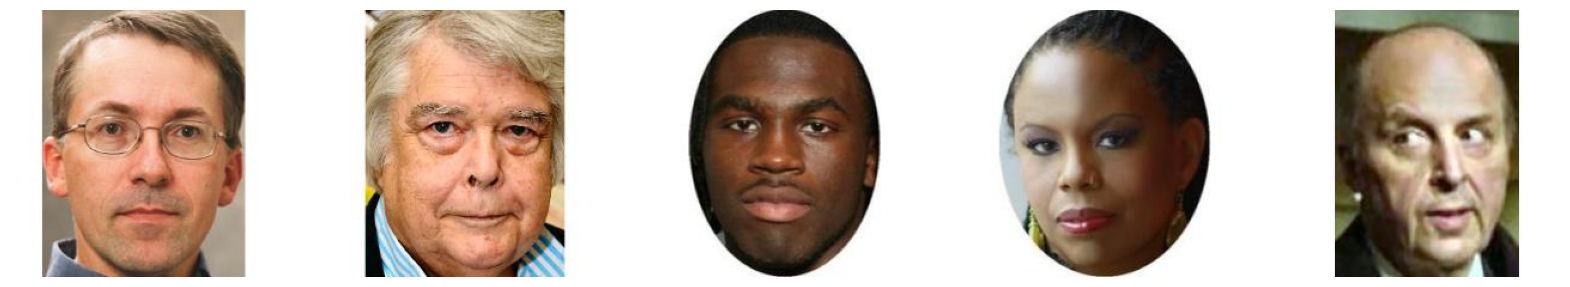

In [16]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*500])
    ax[i].axis('off')

#Pre-processing the data

#converting 3 dimensional image to 1 dimensional image

In [17]:
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2426, 150528)

#Minimum and maximum pixel values of images

In [18]:
X.min(), X.max()

(0, 255)

#Minimum and maximum pixel values of images after normalizing

In [19]:
X.min(), X.max()

(0, 255)

#Splitting the data into training and validation sets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed)

# Displaying the shapes of the training and validation sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_valid.shape, y_valid.shape)

Training set shapes: (1698, 150528) (1698,)
Validation set shapes: (728, 150528) (728,)


#Defining the model architecture

In [21]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

#Summary of the model

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

#Compiling the model

In [23]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

#Training the model

In [24]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.7975 - loss: 0.5235 - val_accuracy: 0.7775 - val_loss: 0.5435
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.7771 - loss: 0.5415 - val_accuracy: 0.7775 - val_loss: 0.5454
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.8099 - loss: 0.4889 - val_accuracy: 0.7775 - val_loss: 0.5331
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7840 - loss: 0.5237 - val_accuracy: 0.7775 - val_loss: 0.5302
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.7848 - loss: 0.5208 - val_accuracy: 0.7775 - val_loss: 0.5303
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.7966 - loss: 0.5057 - val_accuracy: 0.7775 - val_loss: 0.5302
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.7905 - loss: 0.5135 - val_accuracy: 0.7775 - val_loss: 0.5303
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.7936 - loss: 0.5091 - val_accuracy: 0.777

#Evaluating model performance

#Getting predictions in the form of class as well as probabilities

In [25]:
prediction_probabilities = model.predict(X_valid)

predictions = prediction_probabilities.argmax(axis=1)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


#Accuracy on validation set

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.22252747252747251 %


#Summarize history for loss

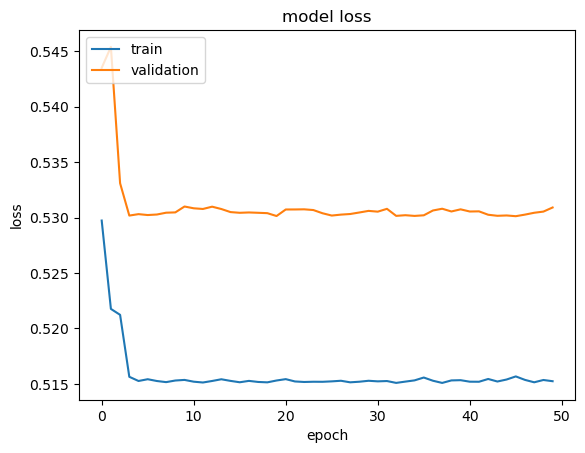

In [27]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Summarize history for accuracy

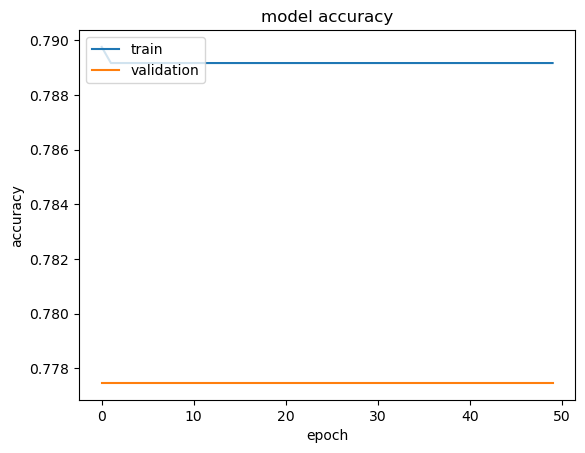

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is [79] % sure that it is Male
And actual class is  1


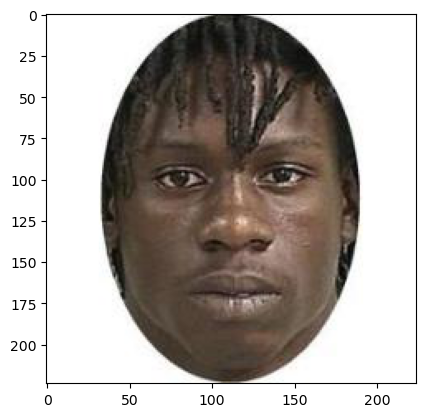

In [40]:
import matplotlib.pyplot as plt

# Pull out the original images from the data which correspond to the validation data
_, valid_Gender, _, valid_y = train_test_split(data_1.image_names.values, y, test_size=0.3, random_state=seed)

# Get a random index to plot image randomly
index = rng.choice(range(len(valid_Gender)))

# Get the corresponding image name and probability
img_name = valid_Gender[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# Read the image
img = plt.imread('images/' + img_name)

# Define the class labels
class_labels = ['Female', 'Male']

# Print probability and actual class
print('Model is', prob , '% sure that it is', class_labels[valid_y[index]])
print('And actual class is ', valid_y[index])

# Plot image
plt.imshow(img)
plt.show()

#Changing activation function of hidden layer

#Using relu as activation function in hidden layer

In [41]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\E2082\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Compiling the model

In [42]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

#Summary of the model

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

#Training the model for 50 epochs

In [44]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.5046 - loss: 4831427.5000 - val_accuracy: 0.7734 - val_loss: 0.6859
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7900 - loss: 0.9414 - val_accuracy: 0.7734 - val_loss: 0.6767
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7785 - loss: 0.6719 - val_accuracy: 0.7734 - val_loss: 0.6670
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7945 - loss: 0.6605 - val_accuracy: 0.7747 - val_loss: 0.6583
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.7764 - loss: 0.6540 - val_accuracy: 0.7747 - val_loss: 0.6499
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7906 - loss: 0.6432 - val_accuracy: 0.7747 - val_loss: 0.6420
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.7902 - loss: 0.6352 - val_accuracy: 0.7747 - val_loss: 0.6349
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.7860 - loss: 0.6289 - val_accuracy: 0

#Accuracy on validation set

In [45]:
import numpy as np

raw_predictions = model.predict(X_valid)
predicted_classes = np.argmax(raw_predictions, axis=1)

accuracy = np.mean(predicted_classes == y_valid)
print('Accuracy on validation set:', accuracy, '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy on validation set: 0.22252747252747251 %


#Summarize history for loss

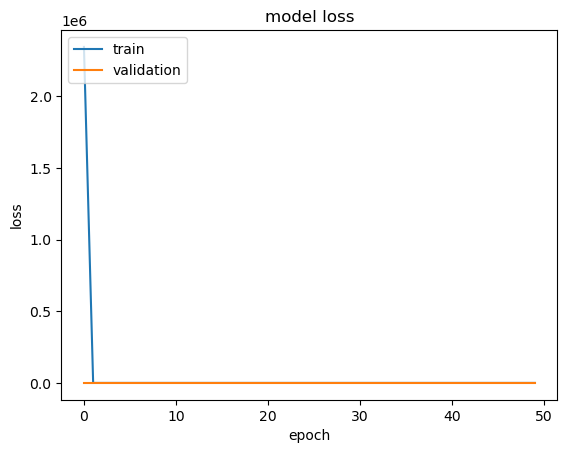

In [46]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Increase hidden neurons

In [47]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

#Compiling the model

In [48]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

#Model summary

In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1024)                │     154,141,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,142,721 (588.01 MB)

 Trainable params: 154,142,721 (588.01 MB)

 Non-trainable params: 0 (0.00 B)

#Train the model

In [50]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 564ms/step - accuracy: 0.7379 - loss: 0.7384 - val_accuracy: 0.7775 - val_loss: 0.5315
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 566ms/step - accuracy: 0.7872 - loss: 0.5176 - val_accuracy: 0.7775 - val_loss: 0.5331
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 620ms/step - accuracy: 0.7807 - loss: 0.5255 - val_accuracy: 0.7775 - val_loss: 0.5321
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 680ms/step - accuracy: 0.7958 - loss: 0.5134 - val_accuracy: 0.7775 - val_loss: 0.5294
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 654ms/step - accuracy: 0.7916 - loss: 0.5161 - val_accuracy: 0.7775 - val_loss: 0.5346
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 635ms/step - accuracy: 0.7801 - loss: 0.5249 - val_accuracy: 0.7775 - val_loss: 0.5313
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 666ms/step - accuracy: 0.7736 - loss: 0.5369 - val_accuracy: 0.7775 - val_loss: 0.5506
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 713ms/step - accuracy: 0.7827 - loss: 0.5285 - val_accuracy: 

#Accuracy on validation set

In [51]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_probabilities = model.predict(X_valid)
y_pred_classes =np.argmax(y_pred_probabilities, axis=1)
accuracy = accuracy_score(y_valid, y_pred_classes)
print('Accuracy on validation set:', accuracy, '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Accuracy on validation set: 0.22252747252747251 %


#Summarize history for loss

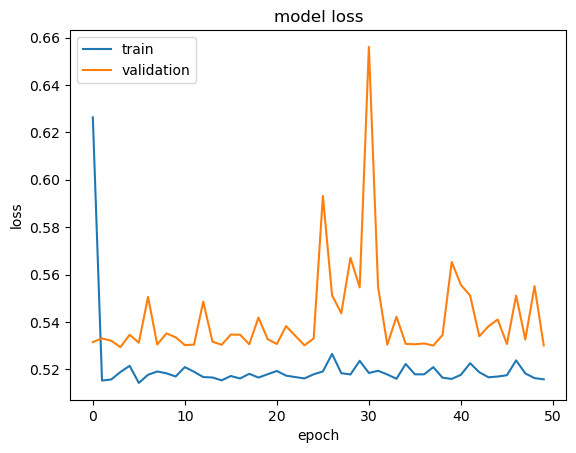

In [52]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Increasing hidden layers

In [53]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\E2082\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Compiling the model

In [54]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

#Model summary

In [55]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
#Train the model

In [56]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.3588 - loss: 0.8442 - val_accuracy: 0.7775 - val_loss: 0.5634
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7822 - loss: 0.5472 - val_accuracy: 0.7775 - val_loss: 0.5337
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7890 - loss: 0.5202 - val_accuracy: 0.7775 - val_loss: 0.5303
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7909 - loss: 0.5140 - val_accuracy: 0.7775 - val_loss: 0.5301
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7876 - loss: 0.5174 - val_accuracy: 0.7775 - val_loss: 0.5302
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7961 - loss: 0.5062 - val_accuracy: 0.7775 - val_loss: 0.5303
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.7931 - loss: 0.5099 - val_accuracy: 0.7775 - val_loss: 0.5303
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7890 - loss: 0.5154 - val_accuracy: 0.7775 - 

In [58]:
#Accuracy on validation set

In [59]:
from sklearn.metrics import accuracy_score
import numpy as np

predictions = model.predict(X_valid)
binary_predictions = np.where(predictions >= 0.5, 1, 0)
accuracy = accuracy_score(y_valid, binary_predictions)
print('Accuracy on validation set:', accuracy)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy on validation set: 0.7774725274725275


#Summarize history for loss

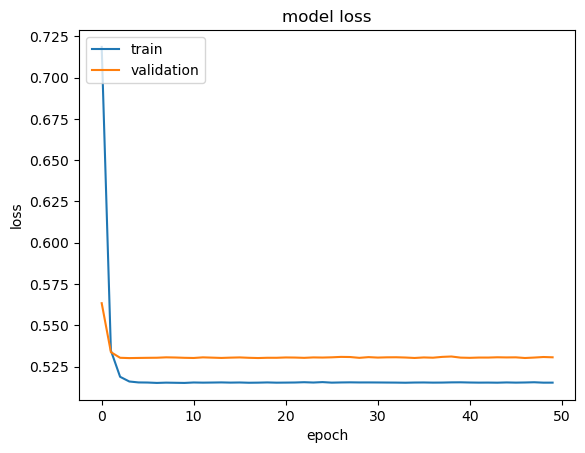

In [60]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Increase number of epochs

In [61]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

C:\Users\E2082\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [62]:
#Model summary

In [63]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

#Train the model

In [64]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7655 - loss: 0.5623 - val_accuracy: 0.7775 - val_loss: 0.5314
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7931 - loss: 0.5097 - val_accuracy: 0.7775 - val_loss: 0.5307
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7815 - loss: 0.5251 - val_accuracy: 0.7775 - val_loss: 0.5305
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7756 - loss: 0.5332 - val_accuracy: 0.7775 - val_loss: 0.5311
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7939 - loss: 0.5088 - val_accuracy: 0.7775 - val_loss: 0.5303
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.7944 - loss: 0.5085 - val_accuracy: 0.7775 - val_loss: 0.5303
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7975 - loss: 0.5034 - val_accuracy: 0.7775 - val_loss: 0.5313
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7855 - loss: 0.5203 - val_accuracy: 0

#Accuracy on validation set

In [65]:
from sklearn.metrics import accuracy_score


predictions = model.predict(X_valid)


binary_predictions = (predictions >= 0.5).astype(int)


accuracy = accuracy_score(y_valid, binary_predictions)

print('Accuracy on validation set:', accuracy)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy on validation set: 0.7774725274725275


#Summarize history for loss

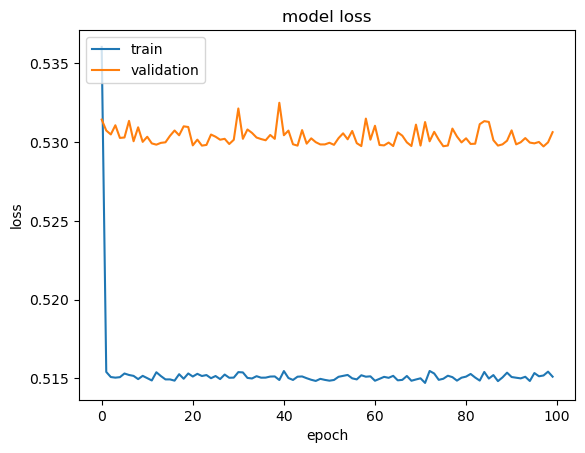

In [66]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Importing adam optimizer from keras optimizer module

In [67]:
from keras.optimizers import Adam

#Defining the adam optimizer and setting the learning rate as 10^-5

In [68]:
adam = adam = Adam(learning_rate=1e-5)

#Change optimizer

In [69]:
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

C:\Users\E2082\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Model summary

In [70]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

#Train the model

In [72]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.7914 - loss: 0.5118 - val_accuracy: 0.7775 - val_loss: 0.5290
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.7813 - loss: 0.5226 - val_accuracy: 0.7775 - val_loss: 0.5278
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.7949 - loss: 0.5043 - val_accuracy: 0.7775 - val_loss: 0.5272
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.7909 - loss: 0.5112 - val_accuracy: 0.7775 - val_loss: 0.5303
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.7895 - loss: 0.5146 - val_accuracy: 0.7775 - val_loss: 0.5304
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.7884 - loss: 0.5161 - val_accuracy: 0.7775 - val_loss: 0.5305
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.7833 - loss: 0.5227 - val_accuracy: 0.7775 - val_loss: 0.5305
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.7890 - loss: 0.5152 - val_accu

#Accuracy on validation set

In [73]:
from sklearn.metrics import accuracy_score
import numpy as np


# Step 1: Convert continuous predictions to binary labels
threshold = 0.5  # Define a threshold to convert continuous predictions to binary labels
binary_predictions = np.where(model.predict(X_valid)[:, 0] >= threshold, 1, 0)

# Step 2: Compute accuracy score
accuracy = accuracy_score(y_valid, binary_predictions)

# Step 3: Print the accuracy
print('Accuracy on validation set:', accuracy , '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Accuracy on validation set: 0.7774725274725275 %


#Summarize history for loss

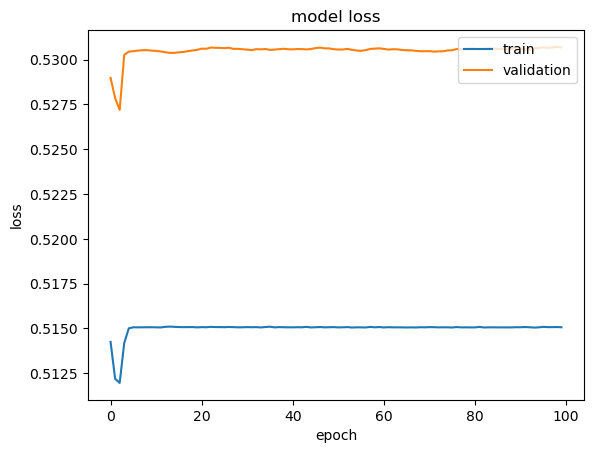

In [74]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#Summarize history for accuracy

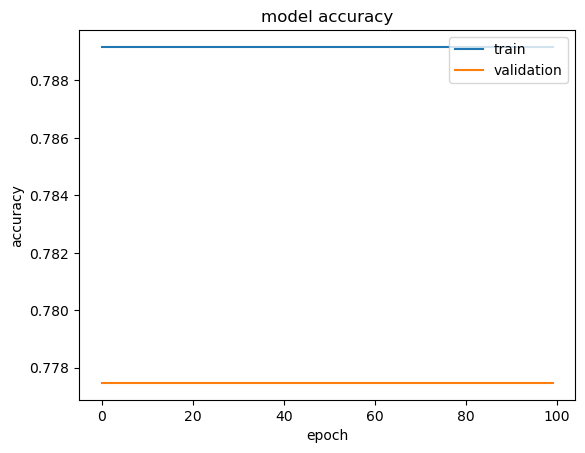

In [75]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Model is [79] % sure that it is Male
And actual class is  1


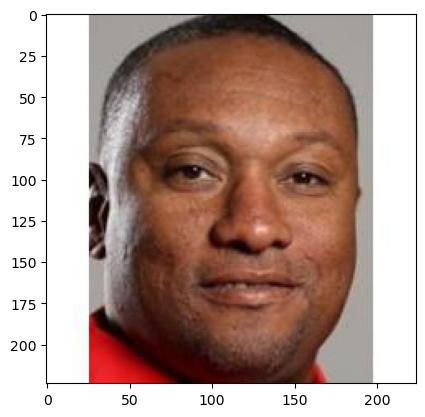

In [78]:
import matplotlib.pyplot as plt

# Pull out the original images from the data which correspond to the validation data
_, valid_Gender, _, valid_y = train_test_split(data_1.image_names.values, y, test_size=0.3, random_state=seed)

# Get a random index to plot image randomly
index = rng.choice(range(len(valid_Gender)))

# Get the corresponding image name and probability
img_name = valid_Gender[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# Read the image
img = plt.imread('images/' + img_name)

# Define the class labels
class_labels = ['Female', 'Male']

# Print probability and actual class
print('Model is', prob , '% sure that it is', class_labels[valid_y[index]])
print('And actual class is ', valid_y[index])

# Plot image
plt.imshow(img)
plt.show()